# check velocity across the experiment

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

from dataloader.dataset import BaseDataset
from util import cal_velocity

sns.set_theme(style="whitegrid")
DATA_ROOT = Path('/work/data/alldata/')
datalist = np.array([x for x in DATA_ROOT.iterdir()])

Text(0, 0.5, 'wild-type mice')

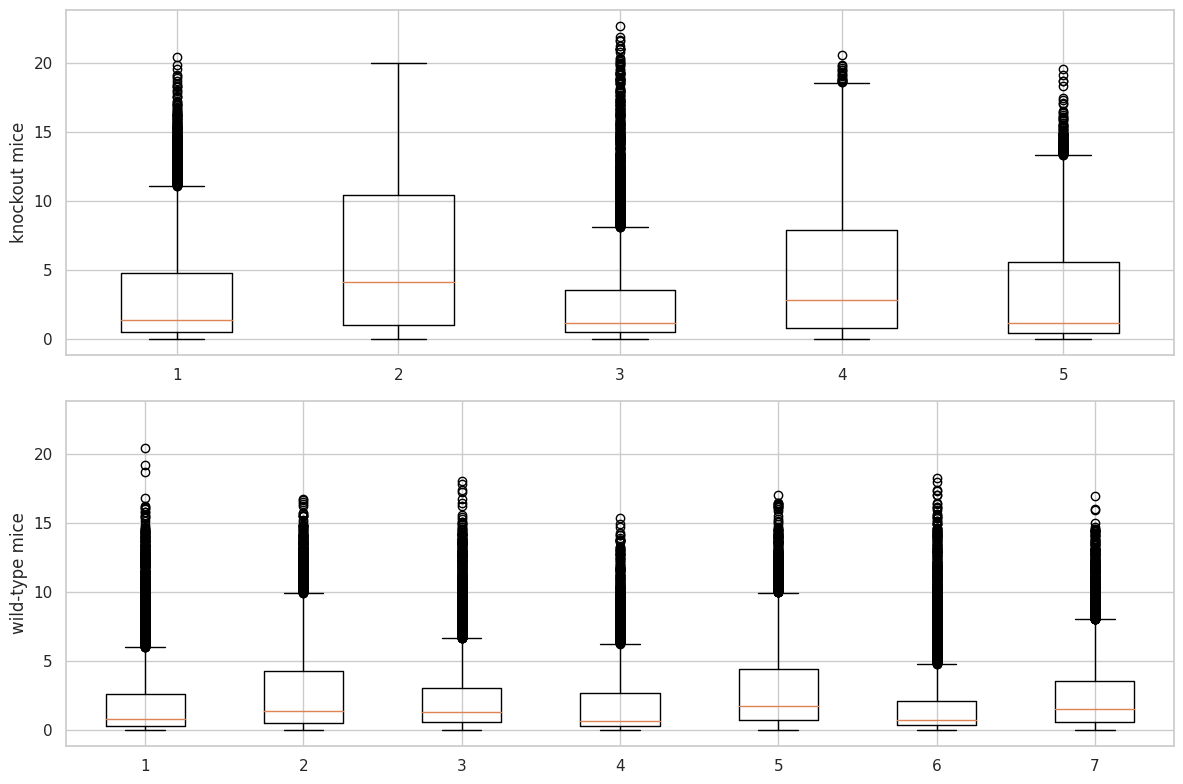

In [2]:
fig, axes = plt.subplots(nrows=2, figsize=(12,8), tight_layout=True, sharey=True)

vel_KO, vel_WT = [], []
for data_dir in datalist:
    dataset = BaseDataset(data_dir, False, False)
    vel = cal_velocity(dataset.coords_xy)
    if "KO" in str(data_dir):
        vel_KO.append(vel)
    else:
        vel_WT.append(vel)

axes[0].boxplot(vel_KO)
axes[0].set_ylabel("knockout mice")
axes[1].boxplot(vel_WT)
axes[1].set_ylabel("wild-type mice")